In [14]:
#Program Name: Daily-XChart-matplotlib
#Purpose:  Chart subplots side by side vs stacked
#Author:  Greg Turmel, Director, Data Governance 
#Date:    2020.08.30 - 2021.06.30
#Errata:  0.1 Improvements can be made to script using for/looping through the databases

import os, sys, argparse, csv, pyodbc, sql, time, datetime
import sqlalchemy as db
from dotenv import load_dotenv # add this line
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import numpy as np
import matplotlib # notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objects as go
load_dotenv() # add this line
user = os.getenv('MySQLeUser')
password = os.getenv('MySQLeUserPass')
host = os.getenv('MySQLeHOST')
db = os.getenv('MySQLeDB')
%matplotlib inline
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [15]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DEVODSSQL;'
                      'Database=Greg;'
                      'Trusted_Connection=yes;')

sql_query01 = pd.read_sql_query(''' 
select DISTINCT TableName
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph

sql_query02 = pd.read_sql_query(''' 
select *
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph


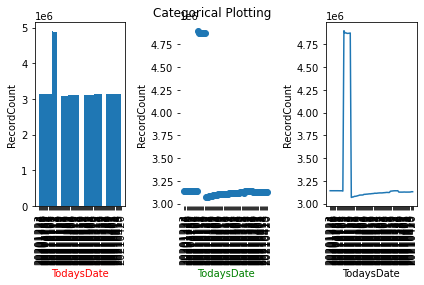

In [10]:
df = pd.DataFrame(sql_query02)
df = df.astype({'TodaysDate':np.str,'RecordCount':np.int64})
dfa = df.sort_values(by=['TableName','SchemaName','DatabaseName','TodaysDate'], ascending=[True,True,True,True])
dfb = pd.DataFrame(dfa, columns= ['TableName','SchemaName','DatabaseName','TodaysDate','RecordCount','Ddifference'])
dfc = dfb.reset_index(drop=True)
dfappdata0001 = dfc[(dfc['DatabaseName'] == 'ApplicationData') & (dfc['SchemaName'] == 'ABC') & (dfc['TableName'] == 'ClasStuABCYrSum')]

with PdfPages(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\Charts_Matplotlib\AppDataCharts1.pdf') as export_pdf:

    Date = dfappdata0001['TodaysDate']
    Count = dfappdata0001['RecordCount']

    #plt.figure(figsize=(9, 3))

    plt.subplot(131)
    plt.bar(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10, color='red')
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
   

    plt.subplot(132, frameon=False)
    plt.scatter(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10, color='green')
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
    

    plt.subplot(133)
    plt.plot(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10)
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
    

    plt.suptitle('Categorical Plotting')
    plt.show()
    plt.draw()
    export_pdf.savefig()
    plt.close()
    

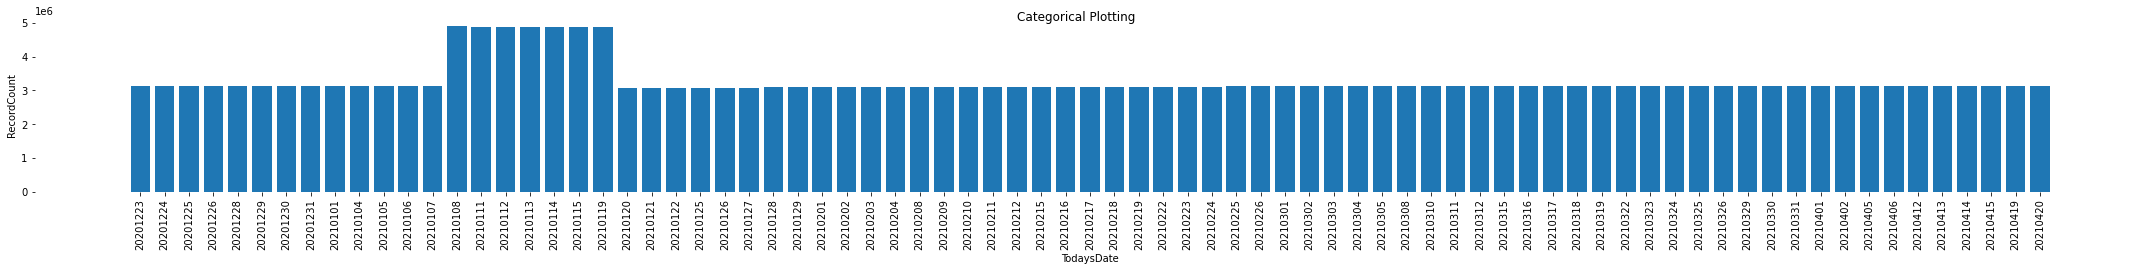

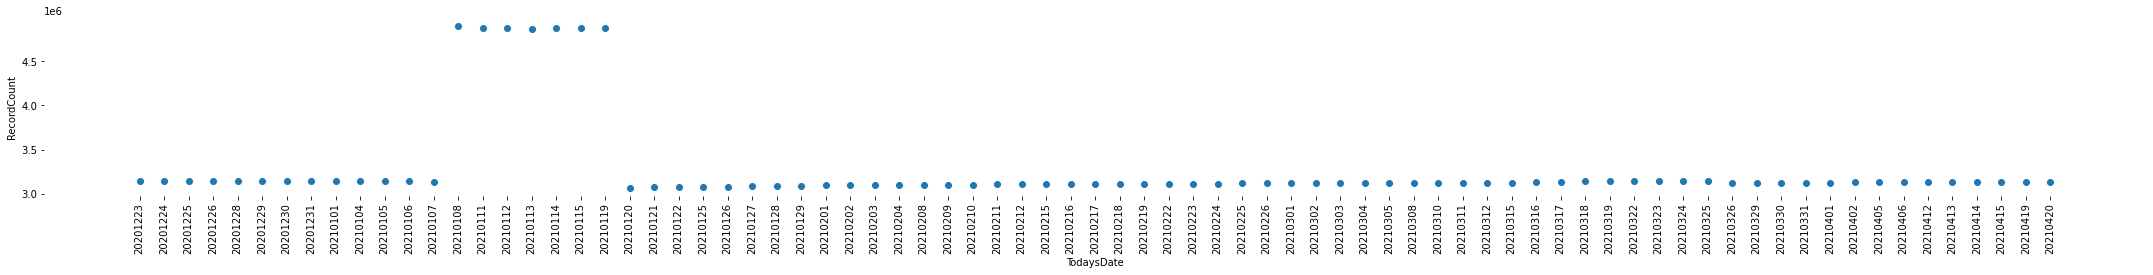

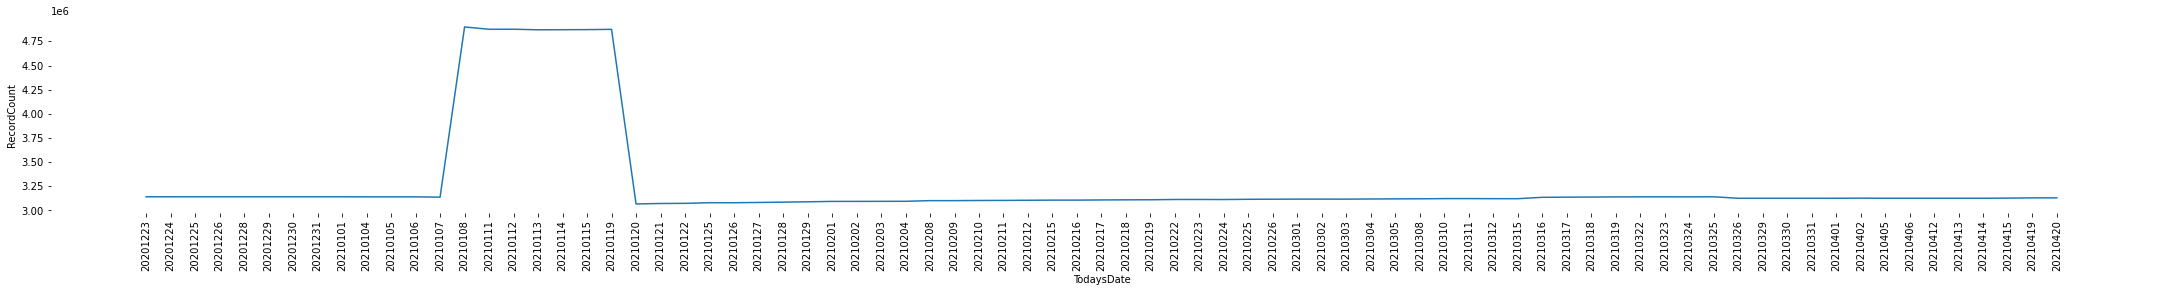

<Figure size 2160x720 with 0 Axes>

In [11]:
df = pd.DataFrame(sql_query02)
df = df.astype({'TodaysDate':np.str,'RecordCount':np.int64})
dfa = df.sort_values(by=['TableName','SchemaName','DatabaseName','TodaysDate'], ascending=[True,True,True,True])
dfb = pd.DataFrame(dfa, columns= ['TableName','SchemaName','DatabaseName','TodaysDate','RecordCount','Ddifference'])
dfc = dfb.reset_index(drop=True)
dfappdata0001 = dfc[(dfc['DatabaseName'] == 'ApplicationData') & (dfc['SchemaName'] == 'ABC') & (dfc['TableName'] == 'ClasStuABCYrSum')]

with PdfPages(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\Charts_Matplotlib\AppDataCharts1.pdf') as pdf:

    Date = dfappdata0001['TodaysDate']
    Count = dfappdata0001['RecordCount']

    plt.suptitle('Categorical Plotting')
    
    plt.subplot(311, frameon=False)
    plt.bar(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10)
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
    plt.draw()
    fig = plt.figure()
    pdf.savefig()
    
    plt.subplot(312, frameon=False)
    plt.scatter(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10)
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
    plt.draw()
    fig = plt.figure()
    pdf.savefig()

    plt.subplot(313, frameon=False)
    plt.plot(Date, Count)
    plt.xlabel('TodaysDate', fontsize=10)
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    matplotlib.rc('figure', figsize=(30, 10))
    plt.tight_layout()
    #ax.margins(0.2, 0.2)
    plt.draw()
    fig = plt.figure()  
    pdf.savefig()
    
    plt.show()

    #export_pdf.savefig()
    plt.close()
    

In [13]:
df = pd.DataFrame(sql_query02)
df = df.astype({'TodaysDate':np.str,'RecordCount':np.int64})
dfa = df.sort_values(by=['TableName','SchemaName','DatabaseName','TodaysDate'], ascending=[True,True,True,True])
dfb = pd.DataFrame(dfa, columns= ['TableName','SchemaName','DatabaseName','TodaysDate','RecordCount','Ddifference'])
dfc = dfb.reset_index(drop=True)
dfappdata0001 = dfc[(dfc['DatabaseName'] == 'ApplicationData') & (dfc['SchemaName'] == 'ABC') & (dfc['TableName'] == 'ClasStuABCYrSum')]

with PdfPages(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\Charts_Matplotlib\AppDataCharts3.pdf') as export_pdf:
  
    plt.scatter(dfappdata0001['TodaysDate'], dfappdata0001['RecordCount'], color='green')
    plt.title('ApplicationData: ClasStuABCYrSum', y=1, fontsize=18)

    #plt.legend(loc='best')
    plt.xlabel('TodaysDate', fontsize=10)
    plt.ylabel('RecordCount', fontsize=10)
    plt.xticks(rotation='vertical')
    tick_spacing = 3
    plt.tight_layout()
    ax = plt.gca()
    ax.grid(linestyle='--')
    ax.xaxis.set_major_locator(MaxNLocator(nbins=16))
    plt.grid(True)
    matplotlib.rc('figure', figsize=(30, 10))
    plt.draw()
    export_pdf.savefig()
    plt.close()
      
    boxplot = dfappdata0001.boxplot(column=['RecordCount'])
    plt.draw()
    export_pdf.savefig()
    plt.close()

In [ ]:
# Clean up your plots after you are done with them:
# plt.close(fig)

plt.close('all')

In [ ]:
#import time
time.sleep(1) # Sleep for 1 seconds
print(' *** Note: tblRowCountAppDataWdata.csv file written - continue program ***')